<a href="https://colab.research.google.com/github/MuhamadZia/Bioactivity_AChE/blob/main/CDD_ML_Part_2_bioactivity_data_Zia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 302 kB 6.7 MB/s 
     |████████████████████████████████| 10.1 MB 35.3 MB/s 
     |████████████████████████████████| 6.8 MB 28.9 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 127.6 MB 19 kB/s 
     |████████████████████████████████| 269 kB 52.2 MB/s 
     |████████████████████████████████| 1.2 MB 47.0 MB/s 
     |████████████████████████████████| 72 kB 750 kB/s 
     |████████████████████████████████| 248 kB 44.1 MB/s 
     |████████████████████████████████| 14.5 MB 35.0 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=ee0ebe4ab01f8b7144d84855d5f07231281991ec70b02264bbc8c7e525a11d4a
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: nump

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data
This data had processed by Lipinski's Rule and PaDEL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/Drug Discovery'

acetylcholinesterase_bioactivity_data.csv
acetylcholinesterase_bioactivity_Xy.csv


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Drug Discovery/acetylcholinesterase_bioactivity_Xy.csv'
df_compound = pd.read_csv(path)
df_compound.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,standard_value_pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910


In [ ]:
df_compound.shape

(6947, 882)

In [ ]:
df_compound.isnull().sum().sum()

0

In [ ]:
df_compound.index[np.isinf(df_compound).any(1)]

Int64Index([6736], dtype='int64')

In [ ]:
df_compound = df_compound[~df_compound.isin([np.nan, np.inf, -np.inf]).any(1)]
df_compound.index[np.isinf(df_compound).any(1)]

Int64Index([], dtype='int64')

In [ ]:
df_compound.describe()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,standard_value_pIC50
count,6946.000000,6946.000000,6946.000000,6946.000000,6946.0,6946.0,6946.0,6946.0,6946.0,6946.000000,...,6946.000000,6946.0,6946.0,6946.000000,6946.0,6946.0,6946.0,6946.0,6946.0,6946.000000
mean,0.999856,0.994241,0.866398,0.267780,0.0,0.0,0.0,0.0,0.0,0.999856,...,0.000432,0.0,0.0,0.003311,0.0,0.0,0.0,0.0,0.0,5.990362
std,0.011999,0.075673,0.340249,0.442834,0.0,0.0,0.0,0.0,0.0,0.011999,...,0.020779,0.0,0.0,0.057452,0.0,0.0,0.0,0.0,0.0,1.611970
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000
25%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4.920819
50%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,5.886057
75%,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,7.045276
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,...,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,14.301030


# Split Data
Divide data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_compound.drop(columns=['standard_value_pIC50'])
y = df_compound.standard_value_pIC50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5556, 881), (1390, 881), (5556,), (1390,))

In [ ]:
X_train.index[np.isinf(X_train).any(1)]

Int64Index([], dtype='int64')

In [ ]:
X_train.index[np.isnan(X_train).any(1)]

Int64Index([], dtype='int64')

In [ ]:
np.isnan(X_train).any().sum()

0

In [ ]:
np.isinf(X_train).any().sum()

0

# Data Engineering

## Multicolinearity


In [ ]:
#!pip install --user prince

In [ ]:
#import prince

In [ ]:
#mca = prince.MCA()

In [ ]:
#mca.fit(X_train)

In [ ]:
#cols = X_train.columns

In [ ]:
#from scipy.stats import chi2_contingency

In [ ]:
# col_before = []
# mcl = []
# non_mcl = []
# alpha = 0.05
# i = 0
# for col in cols:
#   i+=1
#   print('column check: {}'.format(i))
#   for col1 in cols:
#     if (col1 == col) or (col1 in col_before):
#       col_before.append(col)
#       continue
#     #create contingency table
#     table = pd.crosstab(X_train[col],X_train[col1])
#     stat, p_value, dof, expected = chi2_contingency(table)
#     if p_value < alpha:
#       mcl.append([col,col1])
#     else:
#       non_mcl.append([col,col1])
#       #print('column {} dan {}; p-value:{}'.format(col,col1,p_value))

In [ ]:
#len(non_mcl)

There is too much couple columns what have p_value more than 0.05 (298375). In the next step, we use method to reduce the features.

## Features reduction

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
n = 10
kpca = KernelPCA(n_components=n,kernel='rbf')

In [ ]:
cols_kpca = []
for i in range(1,n+1):
  cols_kpca.append('KPCA_'+str(i))
cols_kpca

['KPCA_1',
 'KPCA_2',
 'KPCA_3',
 'KPCA_4',
 'KPCA_5',
 'KPCA_6',
 'KPCA_7',
 'KPCA_8',
 'KPCA_9',
 'KPCA_10']

In [ ]:
X_train_kpca = pd.DataFrame(kpca.fit_transform(X_train))
X_train_kpca.columns = cols_kpca
X_train_kpca

,KPCA_1,KPCA_2,KPCA_3,KPCA_4,KPCA_5,KPCA_6,KPCA_7,KPCA_8,KPCA_9,KPCA_10
0,0.095844,-0.147162,0.083863,-0.057734,0.033474,-0.061693,-0.045644,-0.020428,0.117230,0.011417
1,0.061383,-0.099942,0.074172,0.000410,-0.021434,-0.038097,-0.015484,0.061928,0.009646,0.015016
2,0.217990,0.027111,0.019126,0.004031,-0.103799,-0.015866,-0.026040,0.002504,0.007563,-0.041567
3,0.170472,0.057337,0.041596,-0.110595,0.011443,0.088991,-0.034518,0.051675,-0.080171,-0.028504
4,-0.167124,-0.067915,-0.043912,0.005689,-0.031846,0.055466,-0.003705,0.033612,0.046114,0.019657
...,...,...,...,...,...,...,...,...,...,...
5551,0.236780,0.016007,-0.012875,0.008535,-0.140885,-0.062950,-0.018274,-0.015605,-0.000185,0.084647
5552,-0.205879,0.003370,-0.058036,-0.041600,-0.037608,0.113366,0.027009,-0.077480,0.054226,0.009831
5553,0.223356,0.039199,0.021199,-0.033921,-0.121734,-0.018012,-0.014028,0.040204,0.056012,-0.030564
5554,0.220601,0.027748,0.016226,0.001477,-0.107482,-0.022897,-0.019247,0.003490,0.021089,-0.040359


In [ ]:
X_test_kpca = pd.DataFrame(kpca.transform(X_test))
X_test_kpca.columns = cols_kpca
X_test_kpca

,KPCA_1,KPCA_2,KPCA_3,KPCA_4,KPCA_5,KPCA_6,KPCA_7,KPCA_8,KPCA_9,KPCA_10
0,0.224233,0.026918,-0.004814,-0.014147,-0.138889,-0.023436,0.019426,-0.038279,0.025319,0.069453
1,-0.074216,-0.050653,0.156646,0.155301,0.030305,-0.022210,0.029679,-0.012333,0.027774,-0.051757
2,0.066772,-0.139195,0.097321,-0.004348,-0.080965,-0.030153,0.022867,0.025015,0.018105,-0.008223
3,-0.142979,0.041432,0.126924,0.042223,0.010169,-0.029080,-0.013033,-0.036777,-0.013634,-0.005046
4,-0.027062,0.124535,-0.088230,0.047228,0.015072,0.066474,0.034477,-0.021498,0.009293,-0.038564
...,...,...,...,...,...,...,...,...,...,...
1385,0.044433,0.121891,0.053689,0.099959,-0.026216,0.006886,-0.008474,0.022285,-0.002470,-0.040763
1386,-0.205879,0.003370,-0.058036,-0.041600,-0.037608,0.113366,0.027009,-0.077480,0.054226,0.009831
1387,-0.128314,-0.066540,-0.031486,0.026242,-0.033016,0.085047,0.027512,0.028427,0.050777,0.036127
1388,0.239002,-0.012790,-0.009188,-0.006199,-0.020622,0.002847,-0.029616,-0.050114,-0.074518,-0.046417


In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(n_components=n)

In [ ]:
cols_nmf = []
for i in range(1,n+1):
  cols_nmf.append('NMF_'+str(i))
cols_nmf

['NMF_1',
 'NMF_2',
 'NMF_3',
 'NMF_4',
 'NMF_5',
 'NMF_6',
 'NMF_7',
 'NMF_8',
 'NMF_9',
 'NMF_10']

In [ ]:
X_train_nmf = pd.DataFrame(nmf.fit_transform(X_train))
X_train_nmf.columns = cols_nmf
X_train_nmf

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


,NMF_1,NMF_2,NMF_3,NMF_4,NMF_5,NMF_6,NMF_7,NMF_8,NMF_9,NMF_10
0,0.000000,0.373450,0.154211,0.000000,0.274272,0.000000,0.000000,0.029151,0.006670,0.000000
1,0.060005,0.300283,0.131402,0.000000,0.051492,0.053179,0.029325,0.000000,0.040613,0.009525
2,0.093672,0.391861,0.000000,0.000000,0.000000,0.036430,0.000000,0.000000,0.012125,0.010116
3,0.221609,0.012718,0.007375,0.000000,0.009226,0.000000,0.000000,0.000000,0.379007,0.000000
4,0.169293,0.043821,0.099292,0.087160,0.000000,0.068581,0.147540,0.204154,0.022175,0.000000
...,...,...,...,...,...,...,...,...,...,...
5551,0.050611,0.430526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281947
5552,0.216819,0.000000,0.139970,0.155736,0.000000,0.000000,0.000000,0.362479,0.000000,0.000000
5553,0.055337,0.434889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5554,0.080897,0.411569,0.000000,0.000000,0.000201,0.033369,0.000000,0.000000,0.000000,0.006894


In [ ]:
X_test_nmf = pd.DataFrame(nmf.transform(X_test))
X_test_nmf.columns = cols_nmf
X_test_nmf

,NMF_1,NMF_2,NMF_3,NMF_4,NMF_5,NMF_6,NMF_7,NMF_8,NMF_9,NMF_10
0,0.048137,0.419855,0.000000,0.000000,0.000000,0.000000,0.000000,0.077843,0.000000,0.234325
1,0.187578,0.003510,0.154981,0.000000,0.033205,0.301587,0.000000,0.038461,0.000000,0.000000
2,0.025826,0.386672,0.158101,0.000000,0.000000,0.051042,0.000000,0.045146,0.011554,0.002118
3,0.205065,0.000000,0.160414,0.000000,0.059624,0.095629,0.000000,0.099131,0.000000,0.023890
4,0.276034,0.006425,0.019241,0.172157,0.004702,0.048058,0.000000,0.082001,0.024228,0.000720
...,...,...,...,...,...,...,...,...,...,...
1385,0.254822,0.029076,0.007110,0.005129,0.000000,0.210873,0.010546,0.027892,0.005587,0.000000
1386,0.216728,0.000000,0.139988,0.155756,0.000000,0.000000,0.000000,0.362557,0.000000,0.000000
1387,0.143835,0.099946,0.150157,0.144371,0.000000,0.065306,0.001535,0.191112,0.004842,0.000000
1388,0.113171,0.257257,0.000000,0.000000,0.054168,0.056931,0.009814,0.004380,0.210577,0.056654


# Check Regression Model 1

In [ ]:
import xgboost

In [ ]:
xgb_reg = xgboost.XGBRegressor()

In [ ]:
xgb_reg.fit(X_train_kpca, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_train_pred = xgb_reg.predict(X_train_kpca)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train, y_train_pred)

0.7780227288631748

In [ ]:
y_test_pred = xgb_reg.predict(X_test_kpca)
r2_score(y_test, y_test_pred)

0.4088092087411357

In [ ]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_train_pred = xgb_reg.predict(X_train)

In [ ]:
r2_score(y_train, y_train_pred)

0.7517416914862584

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_train_kpca, y_train)
y_train_pred = rfr.predict(X_train_kpca)
r2_score(y_train, y_train_pred)

0.8031037340746044

In [ ]:
y_test_pred = rfr.predict(X_test_kpca)
r2_score(y_test, y_test_pred)

0.46308713250917877

In [ ]:
rfr.fit(X_train, y_train)
y_train_pred = rfr.predict(X_train)
r2_score(y_train, y_train_pred)

0.8120931595817449

In [ ]:
y_test_pred = rfr.predict(X_test)
r2_score(y_test, y_test_pred)

0.523694876668138

In [ ]:
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
reg = LazyRegressor()

In [ ]:
models, predictions = reg.fit(X_train_kpca, X_test_kpca, y_train, y_test)

100%|██████████| 42/42 [00:35<00:00,  1.20it/s]


In [ ]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.46,0.46,1.23,4.50
ExtraTreesRegressor,0.44,0.45,1.25,1.56
LGBMRegressor,0.43,0.44,1.26,0.28
HistGradientBoostingRegressor,0.43,0.43,1.26,0.59
BaggingRegressor,0.42,0.42,1.28,0.48
XGBRegressor,0.40,0.41,1.29,0.91
KNeighborsRegressor,0.38,0.39,1.31,0.09
MLPRegressor,0.34,0.35,1.36,6.60
GradientBoostingRegressor,0.32,0.32,1.38,1.92


In [ ]:
reg_default = LazyRegressor()
models, predictions = reg_default.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [09:59<00:00, 14.28s/it]


In [ ]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,-0.29,0.53,1.15,16.80
RandomForestRegressor,-0.30,0.53,1.16,29.96
LGBMRegressor,-0.30,0.52,1.16,2.23
HistGradientBoostingRegressor,-0.30,0.52,1.16,31.48
BaggingRegressor,-0.34,0.51,1.18,3.53
KNeighborsRegressor,-0.53,0.44,1.26,15.99
SVR,-0.55,0.43,1.26,56.59
NuSVR,-0.55,0.43,1.27,44.30
GradientBoostingRegressor,-0.59,0.42,1.28,9.68


In [ ]:
reg_nmf = LazyRegressor()
models, predictions = reg_nmf.fit(X_train_nmf, X_test_nmf, y_train, y_test)

100%|██████████| 42/42 [00:36<00:00,  1.15it/s]


In [ ]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.45,0.45,1.24,3.59
ExtraTreesRegressor,0.45,0.45,1.25,1.44
XGBRegressor,0.42,0.42,1.27,0.71
HistGradientBoostingRegressor,0.41,0.41,1.29,0.67
BaggingRegressor,0.40,0.40,1.30,0.39
LGBMRegressor,0.40,0.40,1.30,0.31
KNeighborsRegressor,0.36,0.37,1.34,0.15
GradientBoostingRegressor,0.31,0.32,1.39,1.40
MLPRegressor,0.29,0.29,1.41,6.66


RandomForestReg and ExtraTreesReg are the highest of result. Unfortunately, these score is not good enough. Then, we check the relation each feature and target.

#Check Relation each Feature and Target

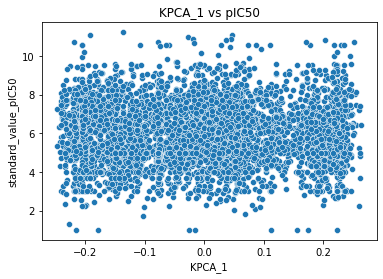

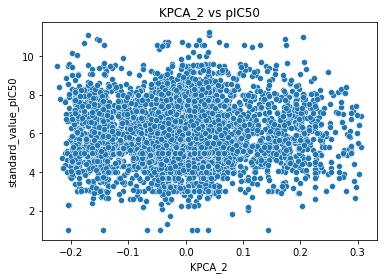

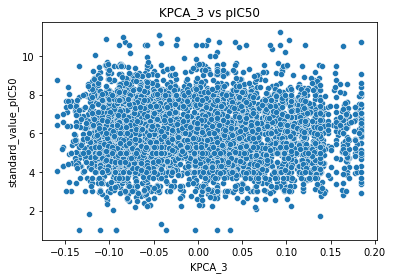

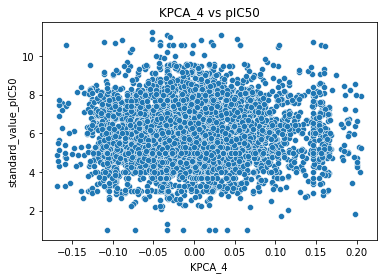

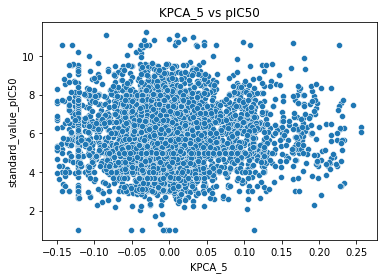

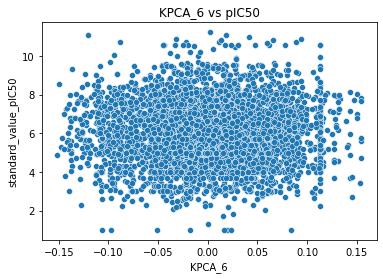

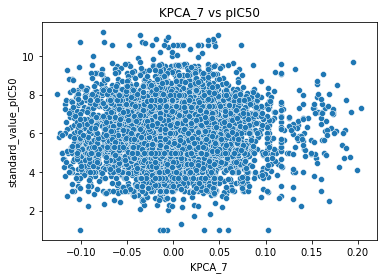

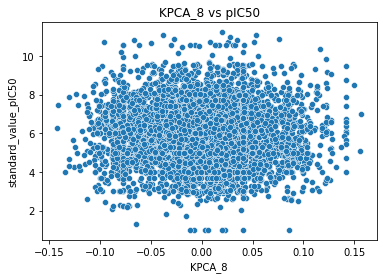

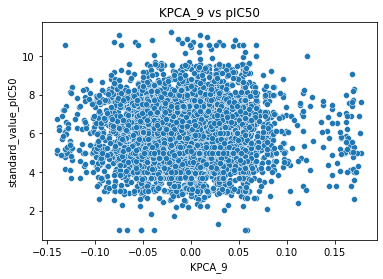

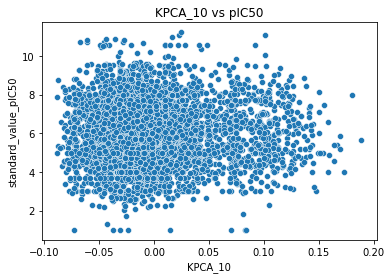

In [ ]:
for col in cols_kpca:
  sns.scatterplot(x=X_train_kpca[col], y=y_train)
  plt.title('{} vs pIC50'.format(col))
  plt.show()

In [ ]:
X_train_kpca.corr()

,KPCA_1,KPCA_2,KPCA_3,KPCA_4,KPCA_5,KPCA_6,KPCA_7,KPCA_8,KPCA_9,KPCA_10
KPCA_1,1.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
KPCA_2,-0.00,1.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
KPCA_3,0.00,-0.00,1.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00
KPCA_4,-0.00,0.00,-0.00,1.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
KPCA_5,0.00,-0.00,0.00,-0.00,1.00,-0.00,-0.00,0.00,-0.00,-0.00
KPCA_6,-0.00,-0.00,0.00,0.00,-0.00,1.00,0.00,0.00,-0.00,-0.00
KPCA_7,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,1.00,0.00,0.00,-0.00
KPCA_8,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,1.00,0.00,0.00
KPCA_9,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,1.00,0.00
KPCA_10,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,1.00


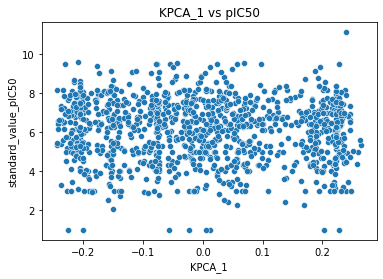

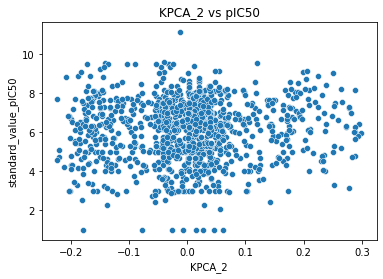

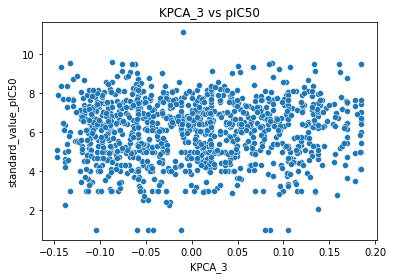

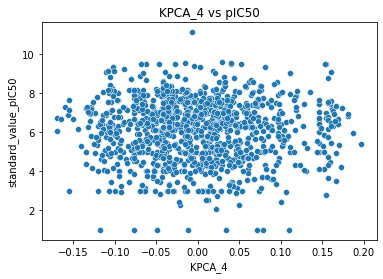

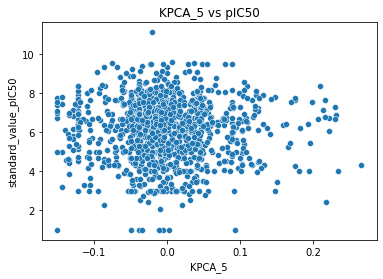

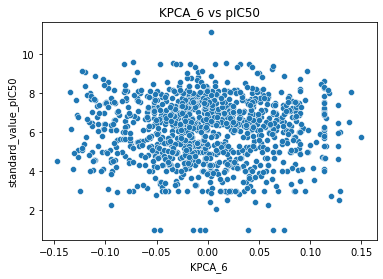

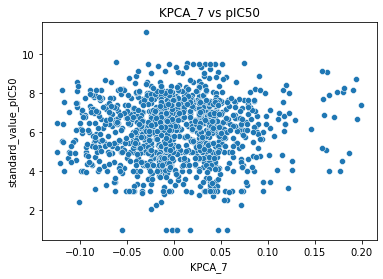

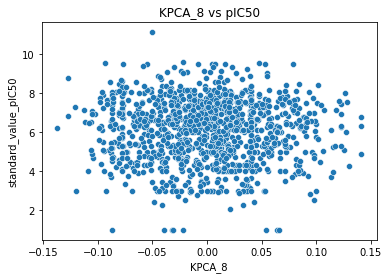

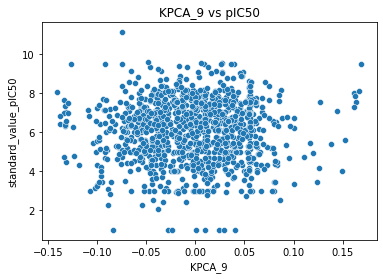

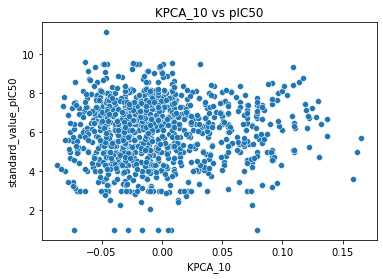

In [ ]:
for col in cols_kpca:
  sns.scatterplot(x=X_test_kpca[col], y=y_train)
  plt.title('{} vs pIC50'.format(col))
  plt.show()

In [ ]:
len(X_train.columns)

881

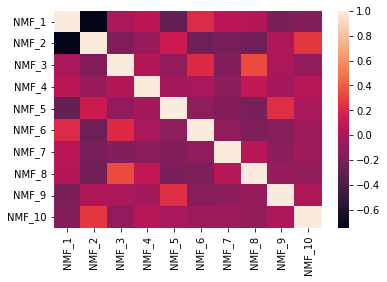

In [ ]:
sns.heatmap(X_train_nmf.corr())

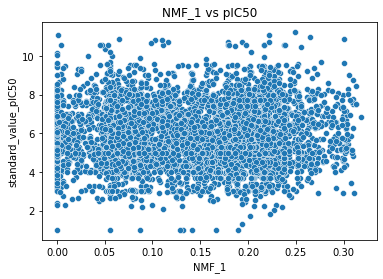

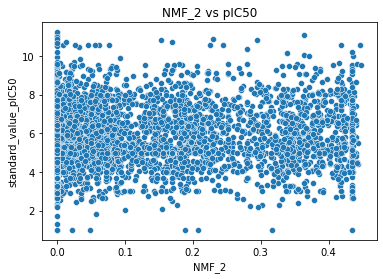

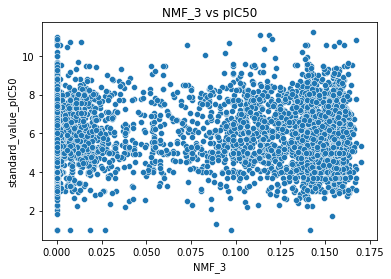

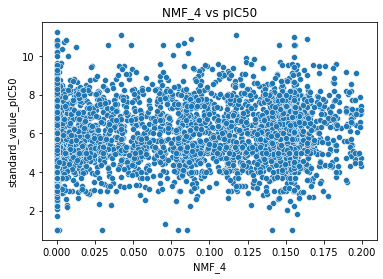

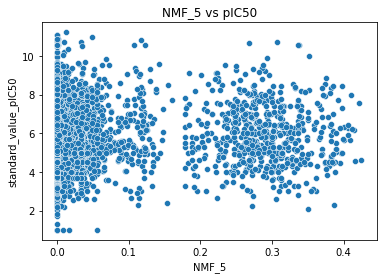

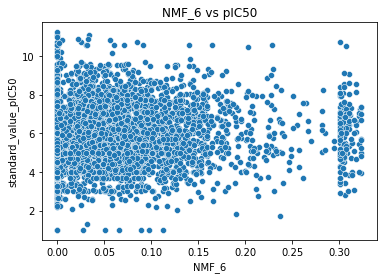

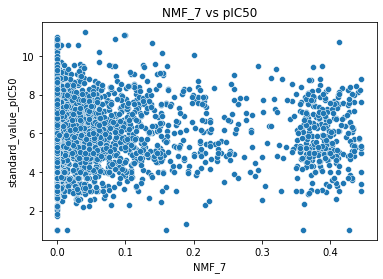

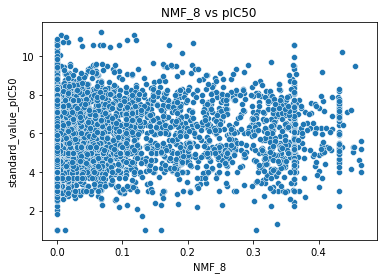

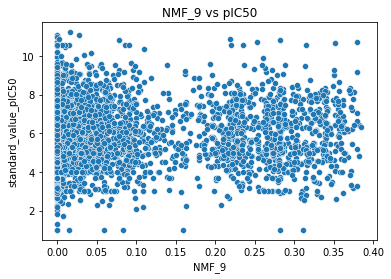

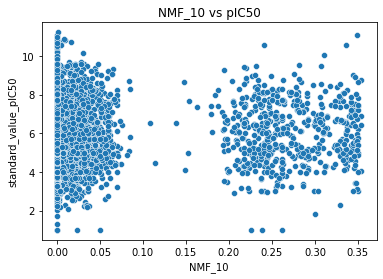

In [ ]:
for col in cols_nmf:
  sns.scatterplot(x=X_train_nmf[col], y=y_train)
  plt.title('{} vs pIC50'.format(col))
  plt.show()

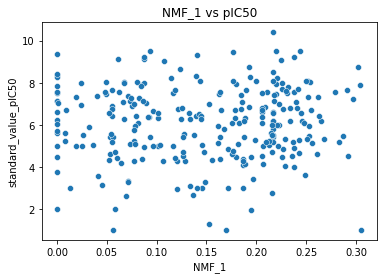

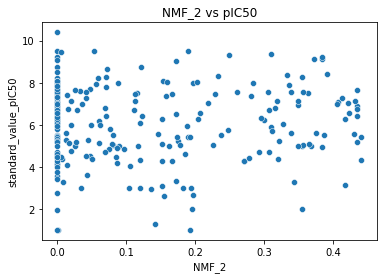

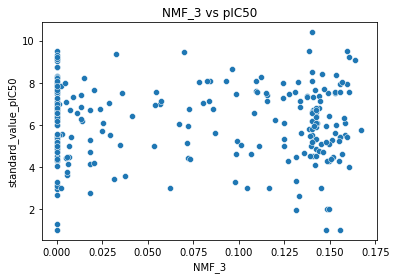

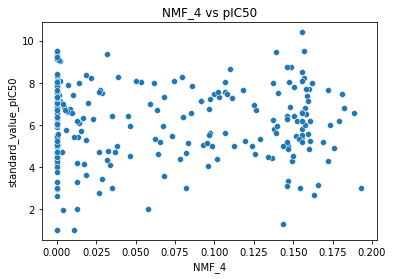

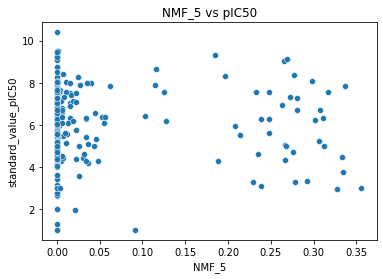

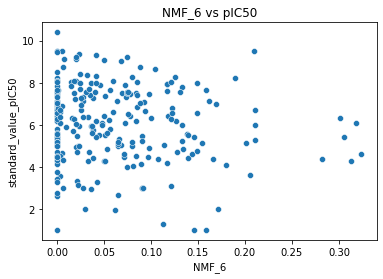

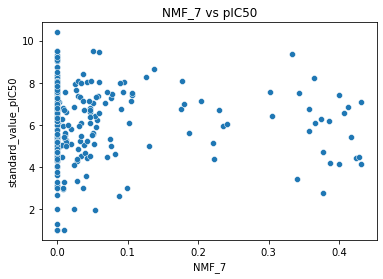

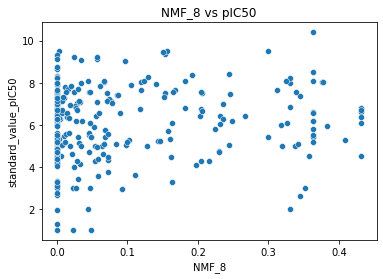

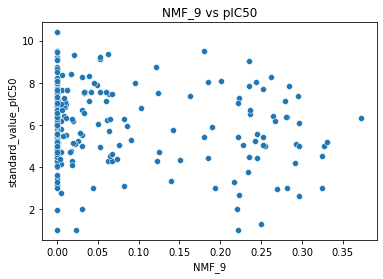

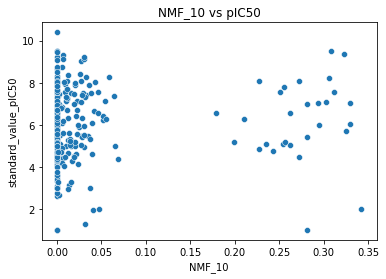

In [ ]:
for col in cols_nmf:
  sns.scatterplot(x=X_test_nmf[col], y=y_test)
  plt.title('{} vs pIC50'.format(col))
  plt.show()

The relation feature and pIC50 is not showed from those graph. Then, i make a classification pIC50 as "active" and "inactive".

# Classification target (pIC50)

## Classification: Active, Inactive, & Intermediate

In [ ]:
y_train

3267   5.08
3710   5.07
2391   7.15
2680   3.24
238    5.52
       ... 
2480   6.77
4639   6.80
2899   7.33
503    6.89
4212   6.42
Name: standard_value_pIC50, Length: 5556, dtype: float64

In [ ]:
limit_IC50_inactive = 10**(4)
limit_IC50_active = 10**(3)
limit_pIC50_inactive = -np.log10((10**-9)*limit_IC50_inactive)
limit_pIC50_active = -np.log10((10**-9)*limit_IC50_active)
limit_pIC50_inactive, limit_pIC50_active

(5.0, 6.0)

In [ ]:
def bioactivity_class(x):
  if float(x) <= 5:
    return 'inactive'
  elif float(x) >= 6:
    return 'active'
  else:
    return 'intermediate'

In [ ]:
y_train_cls = y_train.apply(lambda x: bioactivity_class(x))
y_train_cls

3267    intermediate
3710    intermediate
2391          active
2680        inactive
238     intermediate
            ...     
2480          active
4639          active
2899          active
503           active
4212          active
Name: standard_value_pIC50, Length: 5556, dtype: object

In [ ]:
y_test_cls = y_test.apply(lambda x: bioactivity_class(x))
y_test_cls

554         inactive
2591    intermediate
2614        inactive
4691          active
3993        inactive
            ...     
6816        inactive
2608          active
4647    intermediate
4895          active
3697    intermediate
Name: standard_value_pIC50, Length: 1390, dtype: object

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
cls = LazyClassifier()

In [ ]:
models, predictions = cls.fit(X_train_kpca, X_test_kpca, y_train_cls, y_test_cls)

100%|██████████| 29/29 [00:21<00:00,  1.36it/s]


In [ ]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.69,0.64,None,0.68,0.73
RandomForestClassifier,0.69,0.64,None,0.68,1.83
LabelSpreading,0.67,0.62,None,0.67,3.01
LabelPropagation,0.67,0.62,None,0.66,1.72
XGBClassifier,0.66,0.62,None,0.66,2.21
BaggingClassifier,0.66,0.61,None,0.65,0.53
LGBMClassifier,0.66,0.61,None,0.65,0.77
KNeighborsClassifier,0.66,0.59,None,0.64,0.10
NuSVC,0.65,0.59,None,0.63,2.77


In [ ]:
cls_default = LazyClassifier()

In [ ]:
models, predictions = cls_default.fit(X_train, X_test, y_train_cls, y_test_cls)

100%|██████████| 29/29 [07:16<00:00, 15.06s/it]


In [ ]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.71,0.66,None,0.70,5.96
XGBClassifier,0.71,0.66,None,0.70,54.67
RandomForestClassifier,0.71,0.66,None,0.70,6.05
ExtraTreesClassifier,0.70,0.65,None,0.69,6.71
BaggingClassifier,0.69,0.64,None,0.68,3.21
ExtraTreeClassifier,0.68,0.63,None,0.67,0.38
DecisionTreeClassifier,0.67,0.62,None,0.67,0.87
KNeighborsClassifier,0.68,0.62,None,0.66,17.07
SVC,0.68,0.61,None,0.66,57.19


In [ ]:
cls_nmf = LazyClassifier()
models, predictions = cls_nmf.fit(X_train_nmf, X_test_nmf, y_train_cls, y_test_cls)

100%|██████████| 29/29 [00:20<00:00,  1.39it/s]


In [ ]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.68,0.64,None,0.68,1.45
LabelSpreading,0.68,0.63,None,0.67,3.15
ExtraTreesClassifier,0.68,0.63,None,0.67,0.75
LabelPropagation,0.68,0.63,None,0.67,2.02
XGBClassifier,0.67,0.62,None,0.66,1.83
BaggingClassifier,0.66,0.61,None,0.65,0.37
LGBMClassifier,0.66,0.61,None,0.65,0.82
DecisionTreeClassifier,0.64,0.59,None,0.63,0.09
KNeighborsClassifier,0.65,0.59,None,0.64,0.12


## Classification: Active & Inactive

In [ ]:
df_compound

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,standard_value_pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.00
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.52
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6942,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.60
6943,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.52
6944,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.54
6945,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.19


In [ ]:
df_compound['bioactivity_class'] = df_compound['standard_value_pIC50'].apply(lambda x: bioactivity_class(x))
df_compound.bioactivity_class

0         active
1         active
2       inactive
3         active
4         active
          ...   
6942      active
6943      active
6944    inactive
6945      active
6946      active
Name: bioactivity_class, Length: 6946, dtype: object

In [ ]:
df_compound.bioactivity_class.value_counts()

active          3340
inactive        2013
intermediate    1593
Name: bioactivity_class, dtype: int64

In [ ]:
df_compound2 = df_compound.copy()
df_compound2 = df_compound2[df_compound2.bioactivity_class != 'intermediate'].reset_index(drop=True)
df_compound2.shape, df_compound.shape

((5353, 883), (6946, 883))

In [ ]:
X2 = df_compound2.drop(columns=['bioactivity_class','standard_value_pIC50'])
y2 = df_compound2.bioactivity_class

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2, random_state=42, test_size=0.2)

In [ ]:
nmf2 = NMF(n_components=n)
cols_nmf = []
for i in range(1,n+1):
  cols_nmf.append('NMF_'+str(i))
#X_train fit_transform with nmf
X2_train_nmf = pd.DataFrame(nmf2.fit_transform(X2_train))
X2_train_nmf.columns = cols_nmf
X2_train_nmf
#X_test transform with equal transform X_train
X2_test_nmf = pd.DataFrame(nmf2.transform(X2_test))
X2_test_nmf.columns = cols_nmf
X2_test_nmf

,NMF_1,NMF_2,NMF_3,NMF_4,NMF_5,NMF_6,NMF_7,NMF_8,NMF_9,NMF_10
0,0.11,0.02,0.00,0.14,0.38,0.08,0.05,0.01,0.00,0.00
1,0.05,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.03,0.36,0.00,0.10,0.05,0.00,0.00,0.01,0.28,0.14
3,0.10,0.18,0.19,0.00,0.30,0.04,0.00,0.00,0.00,0.34
4,0.17,0.01,0.00,0.14,0.00,0.33,0.01,0.02,0.02,0.05
...,...,...,...,...,...,...,...,...,...,...
1066,0.10,0.03,0.16,0.12,0.39,0.00,0.09,0.02,0.25,0.00
1067,0.04,0.50,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.20
1068,0.10,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.02
1069,0.22,0.05,0.09,0.00,0.00,0.00,0.08,0.09,0.01,0.00


### EDA

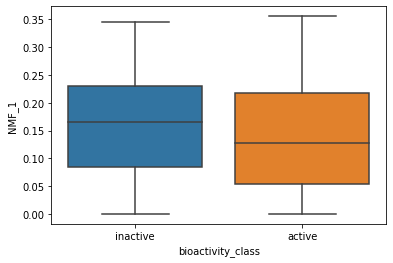

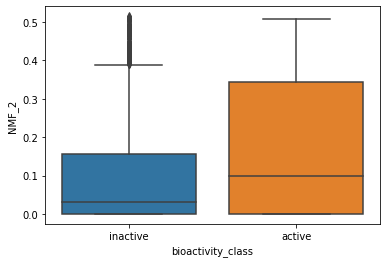

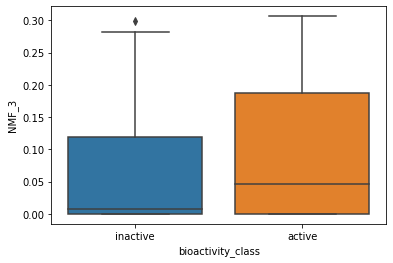

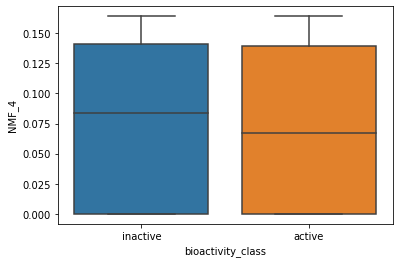

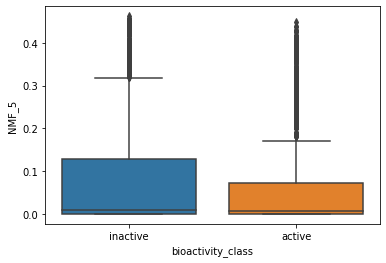

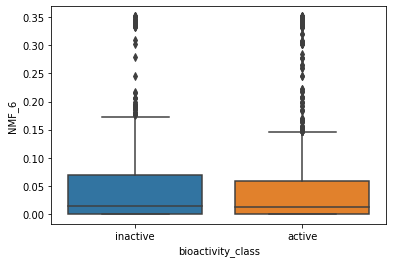

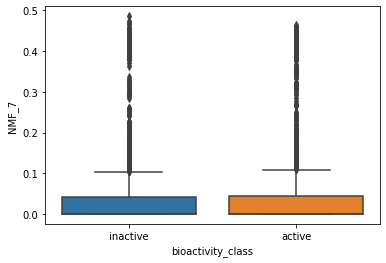

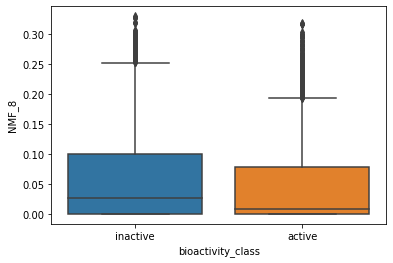

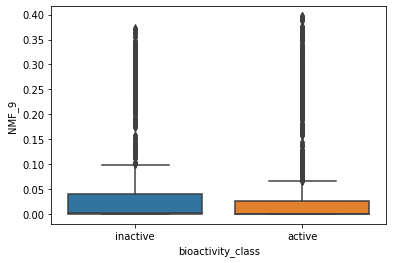

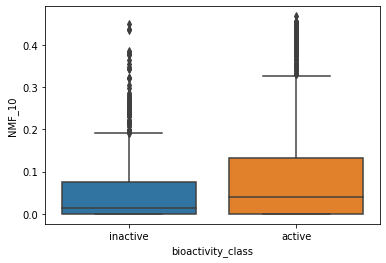

In [ ]:
for col in cols_nmf:
  sns.boxplot(x=y2_train.reset_index(drop=True), y=X2_train_nmf[col])
  plt.show()

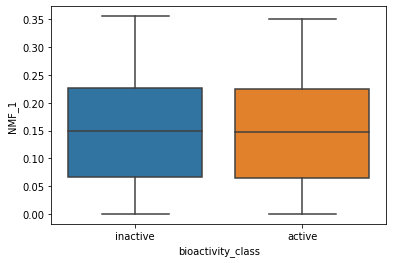

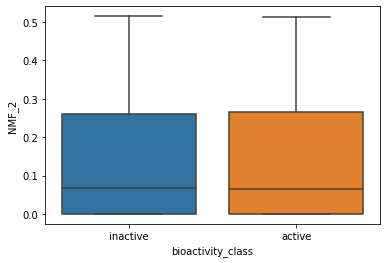

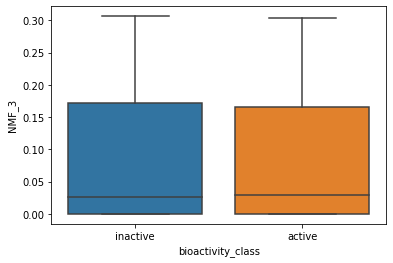

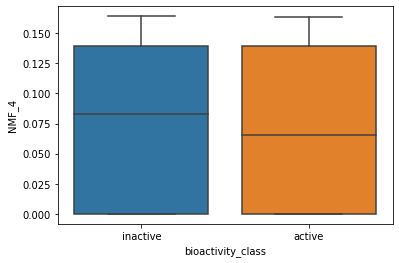

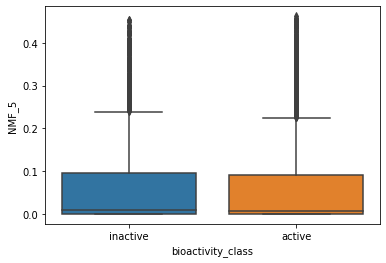

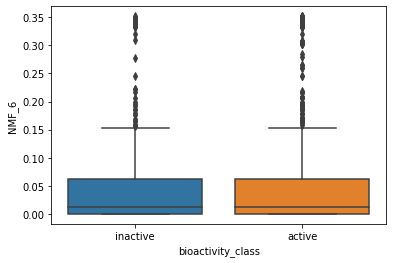

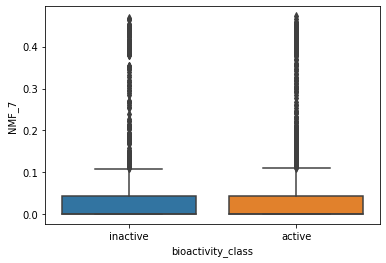

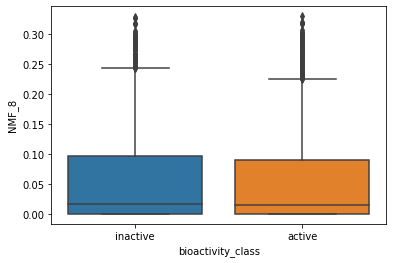

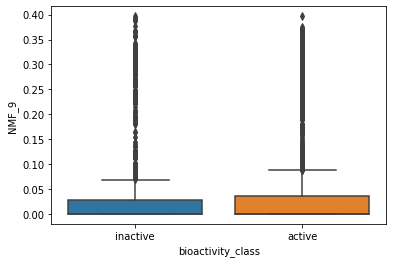

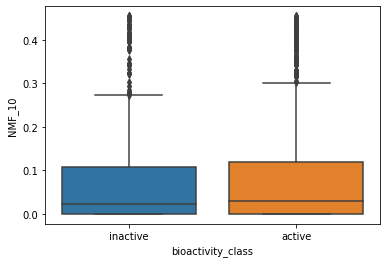

In [ ]:
for col in cols_nmf:
  sns.boxplot(x=y2_train, y=X2_train_nmf[col])
  plt.show()

Index y2 and transformed X2 are different, so the graphs are different too. Therefore the index y2 must to reset.

### Classification Model

In [ ]:
cls2 = LazyClassifier()

In [ ]:
y2_train.reset_index(drop=True, inplace=True)
y2_test.reset_index(drop=True, inplace=True)

In [ ]:
models, predictions = cls2.fit(X2_train_nmf, X2_test_nmf, y2_train, y2_test)

100%|██████████| 29/29 [00:09<00:00,  2.96it/s]


In [ ]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.83,0.81,None,0.83,1.08
LabelSpreading,0.83,0.81,None,0.83,1.55
ExtraTreesClassifier,0.83,0.81,None,0.83,0.53
RandomForestClassifier,0.83,0.81,None,0.83,0.98
XGBClassifier,0.83,0.81,None,0.82,0.52
LGBMClassifier,0.82,0.80,None,0.82,0.27
KNeighborsClassifier,0.81,0.79,None,0.81,0.09
BaggingClassifier,0.81,0.79,None,0.81,0.28
ExtraTreeClassifier,0.78,0.76,None,0.78,0.04


The results of accuracy which intermediate is removed are high score. Then, will we can get the score of regression model with removing intermediate class ?

# Check Regression Model 2

In [ ]:
X3 = df_compound2.drop(columns=['bioactivity_class','standard_value_pIC50'])
y3 = df_compound2.standard_value_pIC50

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, stratify=y2, random_state=42, test_size=0.2)
X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape

nmf3 = NMF(n_components=n)
cols_nmf = []
for i in range(1,n+1):
  cols_nmf.append('NMF_'+str(i))
#X_train fit_transform with nmf
X3_train_nmf = pd.DataFrame(nmf3.fit_transform(X3_train))
X3_train_nmf.columns = cols_nmf
X3_train_nmf
#X_test transform with equal transform X_train
X3_test_nmf = pd.DataFrame(nmf3.transform(X3_test))
X3_test_nmf.columns = cols_nmf
X3_test_nmf

,NMF_1,NMF_2,NMF_3,NMF_4,NMF_5,NMF_6,NMF_7,NMF_8,NMF_9,NMF_10
0,0.11,0.02,0.00,0.14,0.38,0.08,0.05,0.01,0.00,0.00
1,0.05,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.03,0.36,0.00,0.10,0.05,0.00,0.00,0.01,0.28,0.14
3,0.10,0.18,0.19,0.00,0.30,0.04,0.00,0.00,0.00,0.34
4,0.17,0.01,0.00,0.14,0.00,0.33,0.01,0.02,0.02,0.05
...,...,...,...,...,...,...,...,...,...,...
1066,0.10,0.03,0.16,0.12,0.39,0.00,0.09,0.02,0.25,0.00
1067,0.04,0.50,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.20
1068,0.10,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.02
1069,0.22,0.05,0.09,0.00,0.00,0.00,0.08,0.09,0.01,0.00


In [ ]:
reg2 = LazyRegressor()

In [ ]:
models, predictions = reg2.fit(X3_train_nmf, X3_test_nmf, y3_train, y3_test)

100%|██████████| 42/42 [00:24<00:00,  1.68it/s]


In [ ]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.48,0.49,1.27,1.13
RandomForestRegressor,0.48,0.48,1.27,2.72
LGBMRegressor,0.46,0.46,1.29,0.26
HistGradientBoostingRegressor,0.45,0.46,1.30,0.63
BaggingRegressor,0.44,0.45,1.31,0.27
XGBRegressor,0.43,0.43,1.33,0.58
MLPRegressor,0.36,0.37,1.40,5.79
KNeighborsRegressor,0.35,0.36,1.41,0.06
GradientBoostingRegressor,0.35,0.35,1.42,1.05


The score just improve a little bit from Regression Model 1.

The best prediction model for now is classification with two class (Active & Inactive). The default parameters got 0.83 for accuracy score.

Next step is comparing between default and tuning hyperparameters. We choose ExtraTreesClassifier because the best score and minimum running time.

# Classification Model: Hyperparameters VS Default

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# ExtraTreesClassifier((n_estimators=100, *, 
#                       criterion="gini", 
#                       max_depth=None, 
#                       min_samples_split=2, 
#                       min_samples_leaf=1, 
#                       min_weight_fraction_leaf=0, 
#                       max_features="auto", 
#                       max_leaf_nodes=None, 
#                       min_impurity_decrease=0, 
#                       min_impurity_split=None, 
#                       bootstrap=False, 
#                       oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0, max_samples=None))

ExtraTreesClassifier((n_estimators=100, *, 
                      criterion="gini", 
                      max_depth=None, 
                      min_samples_split=2, 
                      min_samples_leaf=1, 
                      min_weight_fraction_leaf=0, 
                      max_features="auto", 
                      max_leaf_nodes=None, 
                      min_impurity_decrease=0, 
                      min_impurity_split=None, 
                      bootstrap=False, 
                      oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0, max_samples=None))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import cross_validate

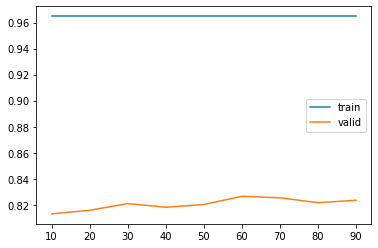

In [ ]:
a = np.arange(10,100,10)
train = []
valid = []
for x in a:
    result = cross_validate(ExtraTreesClassifier(n_estimators=x), 
                   X2_train_nmf,
                   y2_train, 
                   cv=4, 
                   return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')

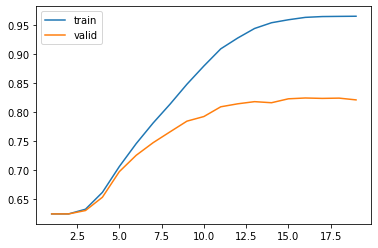

In [ ]:
a = np.arange(1,20,1)
train = []
valid = []
for x in a:
    result = cross_validate(ExtraTreesClassifier(n_estimators=60, max_depth=x), 
                   X2_train_nmf,
                   y2_train, 
                   cv=4, 
                   return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')

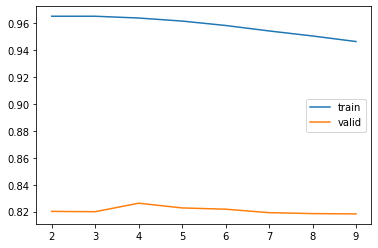

In [ ]:
a = np.arange(1,10,1)
train = []
valid = []
for x in a:
    result = cross_validate(ExtraTreesClassifier(n_estimators=60, min_samples_split=x), 
                   X2_train_nmf,
                   y2_train, 
                   cv=4, 
                   return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid')

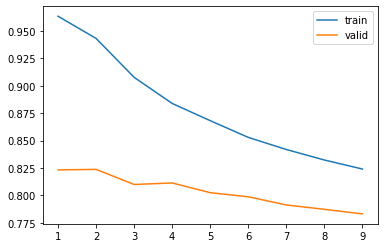

In [ ]:
a = np.arange(1,10,1)
train = []
valid = []
for x in a:
    result = cross_validate(ExtraTreesClassifier(n_estimators=60, min_samples_split=4, min_samples_leaf=x), 
                   X2_train_nmf,
                   y2_train, 
                   cv=4, 
                   return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=a, y=train, label='train')
sns.lineplot(x=a, y=valid, label='valid') 

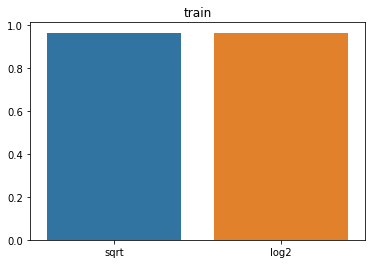

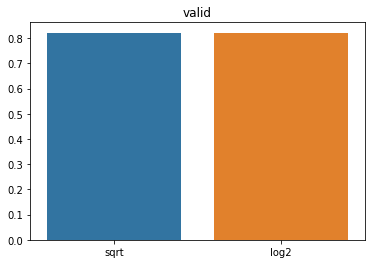

In [ ]:
a = ["sqrt", "log2", None]
train = []
valid = []
for x in a:
    result = cross_validate(ExtraTreesClassifier(n_estimators=60, min_samples_split=4, max_features=x), 
                   X2_train_nmf,
                   y2_train, 
                   cv=4, 
                   return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.barplot(x=a, y=train, label='train')
plt.title('train')
plt.show()
sns.barplot(x=a, y=valid, label='valid')
plt.title('valid')
plt.show() 

In [ ]:
train

[0.9635684493256175, 0.9637241155771742, 0.9641912112899579]

In [ ]:
valid

[0.8222793790413361, 0.8211142089234447, 0.8211137726118485]

The optimized model with hyperparamters tuning is:

ExtraTreesClassifier(n_estimators=60, min_samples_split=4)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
#Default
extratrees=ExtraTreesClassifier()
y2_train_bin = y2_train.map({'active':1, 'inactive':0})
y2_test_bin = y2_test.map({'active':1, 'inactive':0})
extratrees.fit(X2_train_nmf, y2_train_bin)
y2_train_pred = extratrees.predict(X2_train_nmf)
print("Train Result")
print(classification_report(y2_train_bin, y2_train_pred))
print('roc_auc score: ',roc_auc_score(y2_train_bin, 
                                      y2_train_pred))
y2_test_pred = extratrees.predict(X2_test_nmf)
print("Test Result")
print(classification_report(y2_test_bin, y2_test_pred))
print('roc_auc score: ',roc_auc_score(y2_test_bin, 
                                      y2_test_pred))

Train Result
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1610
           1       0.96      0.98      0.97      2672

    accuracy                           0.96      4282
   macro avg       0.96      0.96      0.96      4282
weighted avg       0.96      0.96      0.96      4282

roc_auc score:  0.9575931212109942
Test Result
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       403
           1       0.85      0.89      0.87       668

    accuracy                           0.83      1071
   macro avg       0.82      0.81      0.82      1071
weighted avg       0.83      0.83      0.83      1071

roc_auc score:  0.8123486278064218


In [1]:
#Hyperparamters tuning
extratrees_opt=ExtraTreesClassifier(n_estimators=60, min_samples_split=4)
y2_train_bin = y2_train.map({'active':1, 'inactive':0})
y2_test_bin = y2_test.map({'active':1, 'inactive':0})
extratrees_opt.fit(X2_train_nmf, y2_train_bin)
y2_train_pred = extratrees_opt.predict(X2_train_nmf)
print("Train Result")
print(classification_report(y2_train_bin, y2_train_pred))
print('roc_auc score: ',roc_auc_score(y2_train_bin, 
                                      y2_train_pred))
y2_test_pred = extratrees_opt.predict(X2_test_nmf)
print("Test Result")
print(classification_report(y2_test_bin, y2_test_pred))
print('roc_auc score: ',roc_auc_score(y2_test_bin, 
                                      y2_test_pred))

NameError: ignored

The score of hyperparameters tuning increase although not significant